# Data analysis "Employee dataset"

This dataset contains information about employees in a company, including their educational backgrounds, work history, demographics, and employment-related factors. It has been anonymized to protect privacy while still providing valuable insights into the workforce.



#  **Columns:**

  **Education**: The educational qualifications of employees, including degree, institution, and field of study.

  **Joining Year**: The year each employee joined the company, indicating their length of service.

  **City**: The location or city where each employee is based or works.

  **Payment Tier**: Categorization of employees into different salary tiers.

  **Age**: The age of each employee, providing demographic insights.

  **Gender**: Gender identity of employees, promoting diversity analysis.

  **Ever Benched**: Indicates if an employee has ever been temporarily without assigned work.

  **Experience in Current Domain**: The number of years of experience employees have in their current field.

  **Leave or Not**: a target column




# Potential Research Questions:

    What is the distribution of educational qualifications among employees?
    How does the length of service (Joining Year) vary across different cities?
    Is there a correlation between Payment Tier and Experience in Current Domain?
    What is the gender distribution within the workforce?
    Are there any patterns in leave-taking behavior among employees?


In [1]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import autoviz

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/EDEM/Python_Notebooks/Employee.csv'
data = pd.read_csv(path)
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


Los tipos de datos son bien. Data types are ok

In [27]:
#renaming headers/cambiar el nombre de los encabezados

data = data.rename(columns={'Education':'education', 'JoiningYear':'joining_year','City':'city','PaymentTier':'payment_tier','Age':'age','Gender':'gender',
                            'EverBenched':'ever_benched','ExperienceInCurrentDomain':'experience_in_current_domain','LeaveOrNot':'leave_or_not'})

In [32]:
duplicateRows = data[data.duplicated()]
duplicateRows.head(5)

,education,joining_year,city,payment_tier,age,gender,ever_benched,experience_in_current_domain,leave_or_not
111,Bachelors,2017,Pune,2,27,Female,No,5,1
130,Bachelors,2017,Bangalore,3,26,Female,No,4,0
138,Bachelors,2017,New Delhi,3,28,Male,No,2,0
160,Bachelors,2014,Bangalore,3,28,Female,No,3,0
167,Bachelors,2014,Bangalore,3,25,Male,No,3,0


What is the distribution of educational qualifications among employees?


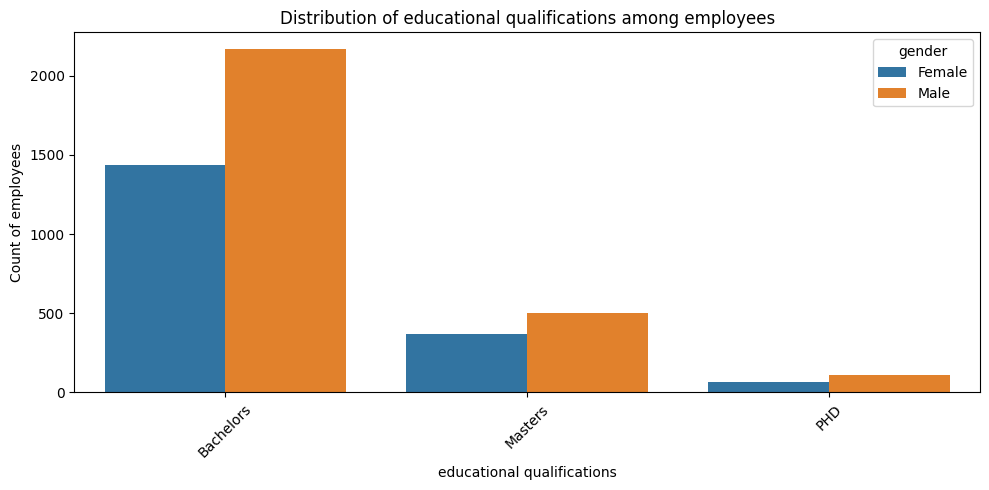

In [72]:
plt.figure(figsize=(10, 5))
sns.barplot(data=data.groupby(['education', 'gender']).size().reset_index(name='count'), x='education', y='count', hue='gender')
plt.xlabel('educational qualifications')
plt.ylabel('Count of employees')
plt.title('Distribution of educational qualifications among employees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**On the graph you can see the predominant number of employees who completed a bachelor's degree. In terms of gender, we can observe that in the context of PHD and bachelor's degrees, the male gender predominates to a greater extent, while in the master's degree this gap is reduced**




How does the length of service (Joining Year) vary across different cities?

[Text(0.5, 1.0, 'Length of service vary across different cities'),
 Text(0.5, 0, 'City'),
 Text(0, 0.5, 'Year')]

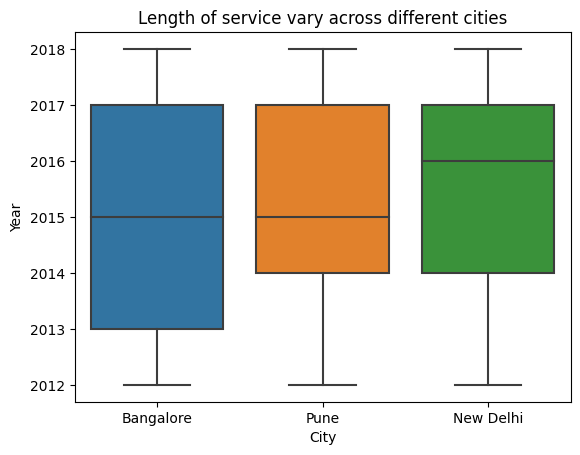

In [40]:
sns.boxplot(x = 'city', y = 'joining_year', data = data).set(title='Length of service vary across different cities', xlabel='City', ylabel='Year')

**In city Bangalore and city Pune we can have the same median value, unlike city New Delhi, where it is higher. In turn, city Bangalore has an earlier year for employees, which may indicate more experienced workers.**

Is there a correlation between Payment Tier and Experience in Current Domain?

<ipython-input-41-d0c94cc860cf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)


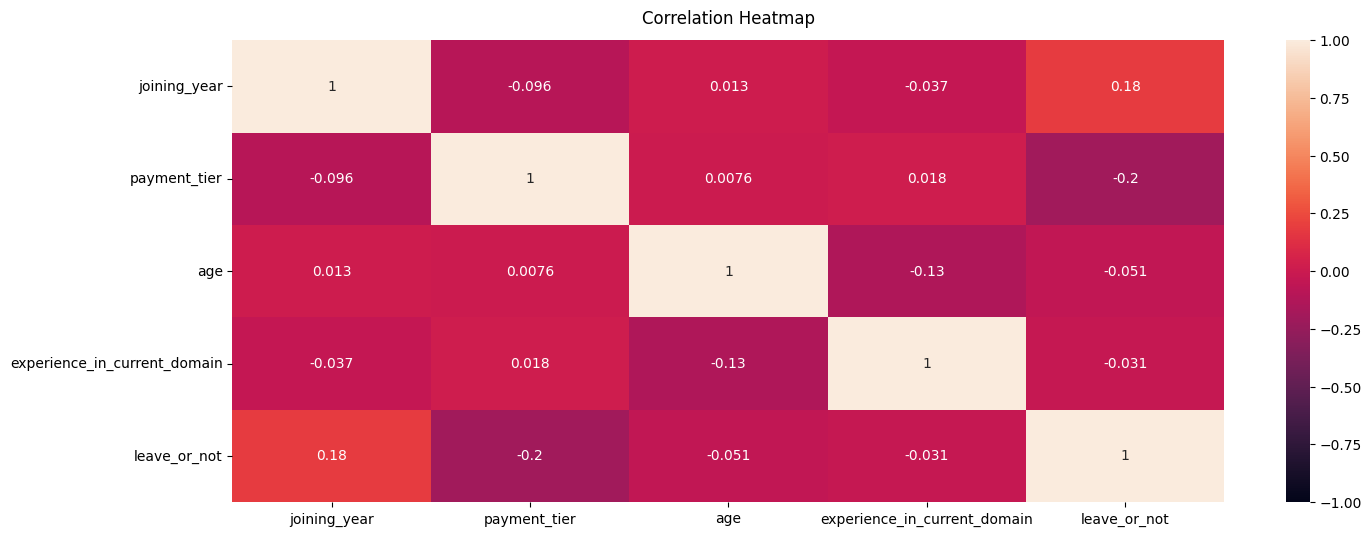

In [41]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**We can observe the lack of correlation between Payment Tier and Experience in Current Domain**

What is the gender distribution within the workforce?

In [62]:
data.groupby('gender')['education'].count().reset_index(name='count')

,gender,count
0,Female,1875
1,Male,2778


**We observe a predominance of males**

Are there any patterns in leave-taking behavior among employees?



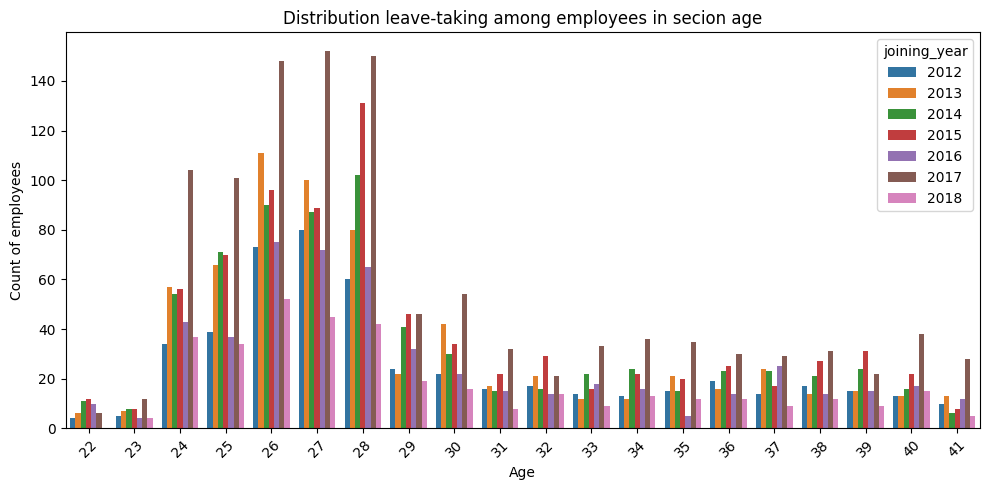

In [73]:
plt.figure(figsize=(10, 5))
sns.barplot(data=data.groupby(['age', 'joining_year'])['leave_or_not'].count().reset_index(name='count'), x='age', y='count', hue='joining_year')
plt.xlabel('Age')
plt.ylabel('Count of employees')
plt.title('Distribution leave-taking among employees in secion age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Workers aged 24 to 29 are more likely to take vacations than older generations. We observe that people who came to work in 2017 go on vacation the most, and people who came to work in 2018 take the least amount of vacation.**

# **Conclusion:**

**In our study, most of the people are people who have received a bachelor's degree; among the general analysis, there are more men than women. Workers from 3 cities were analyzed: according to data in the city of Bangalore, people have more experience than in New Delhi. We observe a low correlation between Payment Tier and Experience in Current Domain. An interesting point is that people who came to work in 2017 most often go on vacation, in turn, people who came in 2018 least often.**